<a href="https://colab.research.google.com/github/sushassassin/VAC_ImageProcessing/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install numpy


In [6]:
%pip install opencv-python

In [7]:
from google.colab import drive 
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [29]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np




In [9]:
from google.colab import drive 
drive.mount('/content/gdrive')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


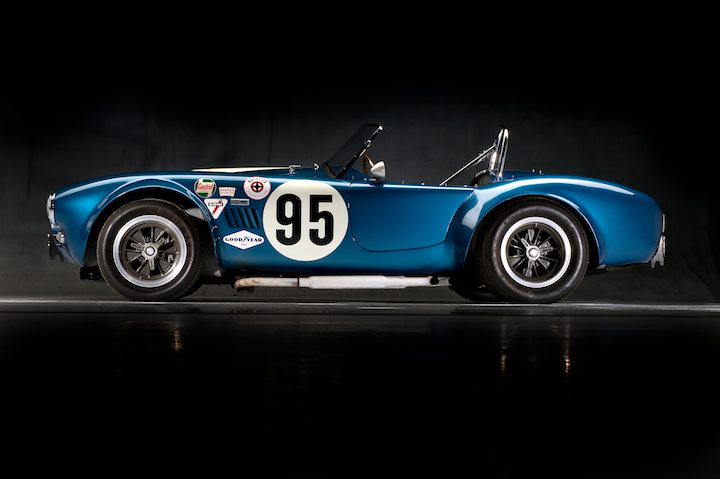

In [138]:
img = cv2.imread(r'/content/drive/MyDrive/image processing/images/1965-Shelby-Cobra-Roadster-Side-Profile.png')  
cv2_imshow(img)




In [139]:
height = img.shape[0]  
width = img.shape[1]  
channels = img.shape[2] 

print(height, width, channels)




479 720 3


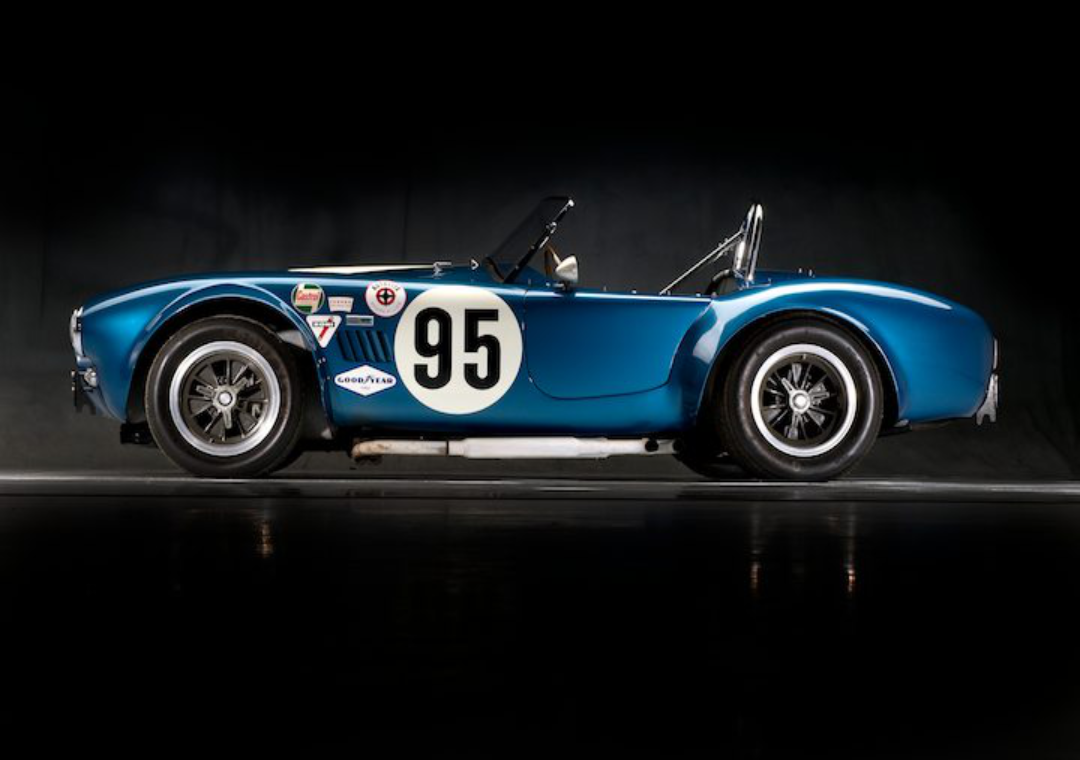

In [140]:
img = cv2.resize(img, (1080, 760))
cv2_imshow(img)

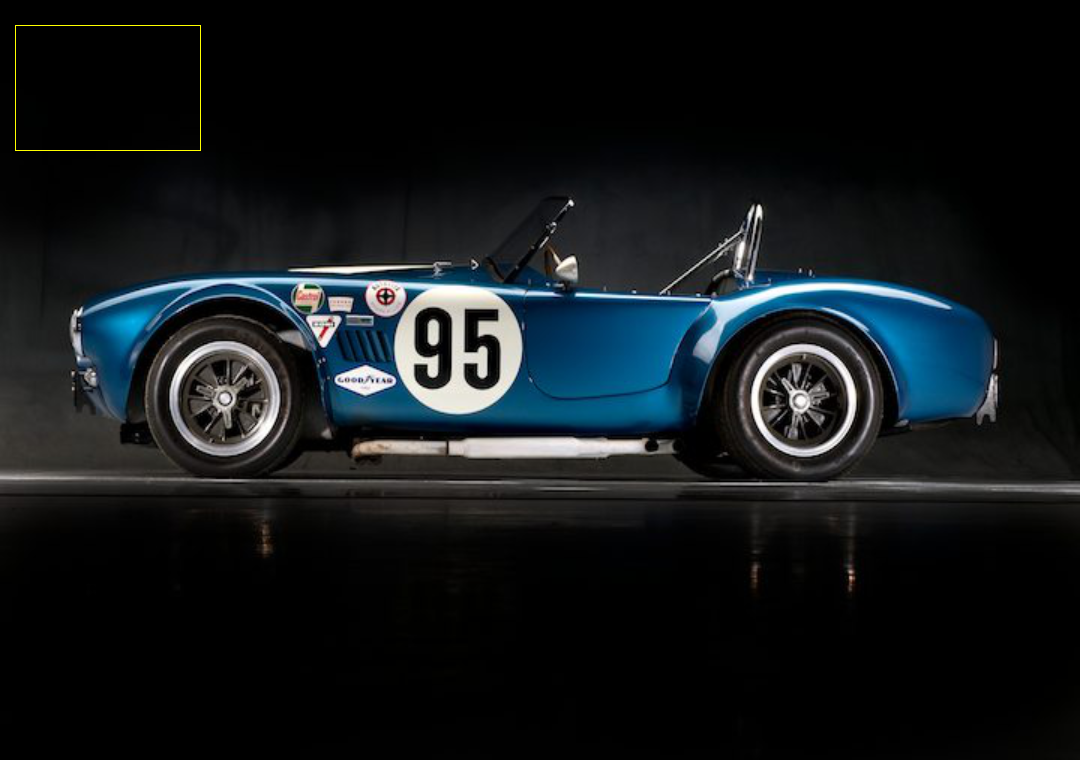

In [141]:
img1= cv2.rectangle(img,(15,25),(200,150),(0,255,255))  
cv2_imshow(img1)  




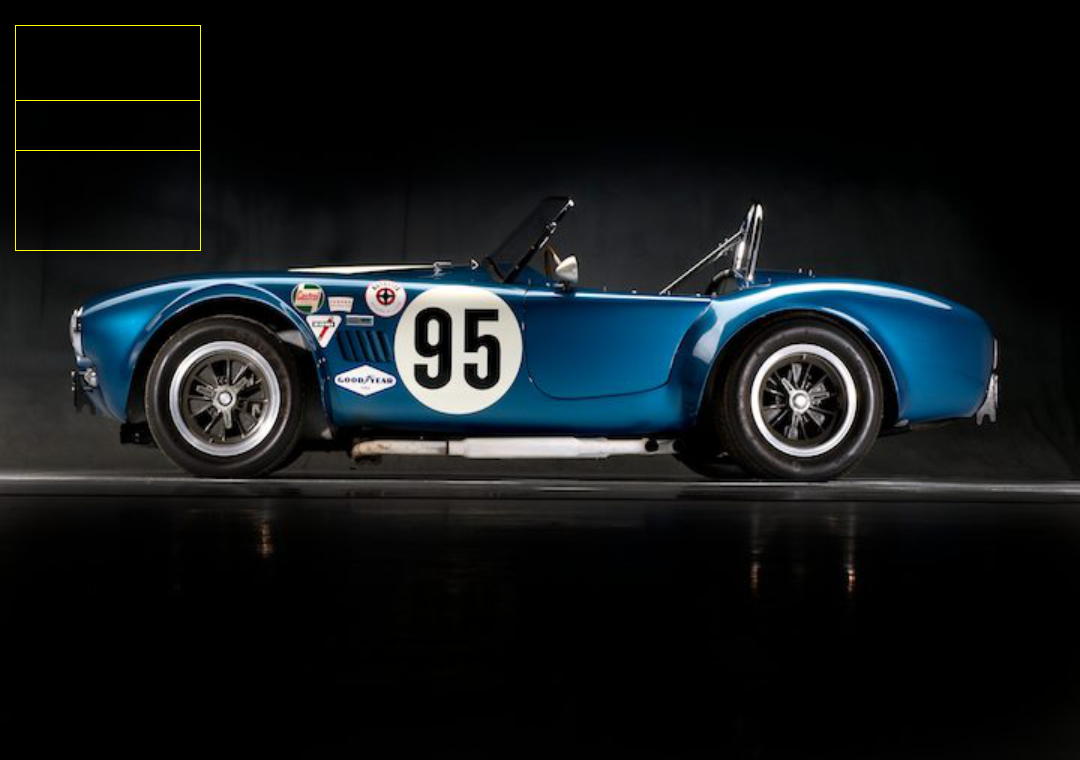

In [144]:
img2= cv2.rectangle(img,(15,250),(200,100),(0,255,255))  
cv2_imshow(img2)  


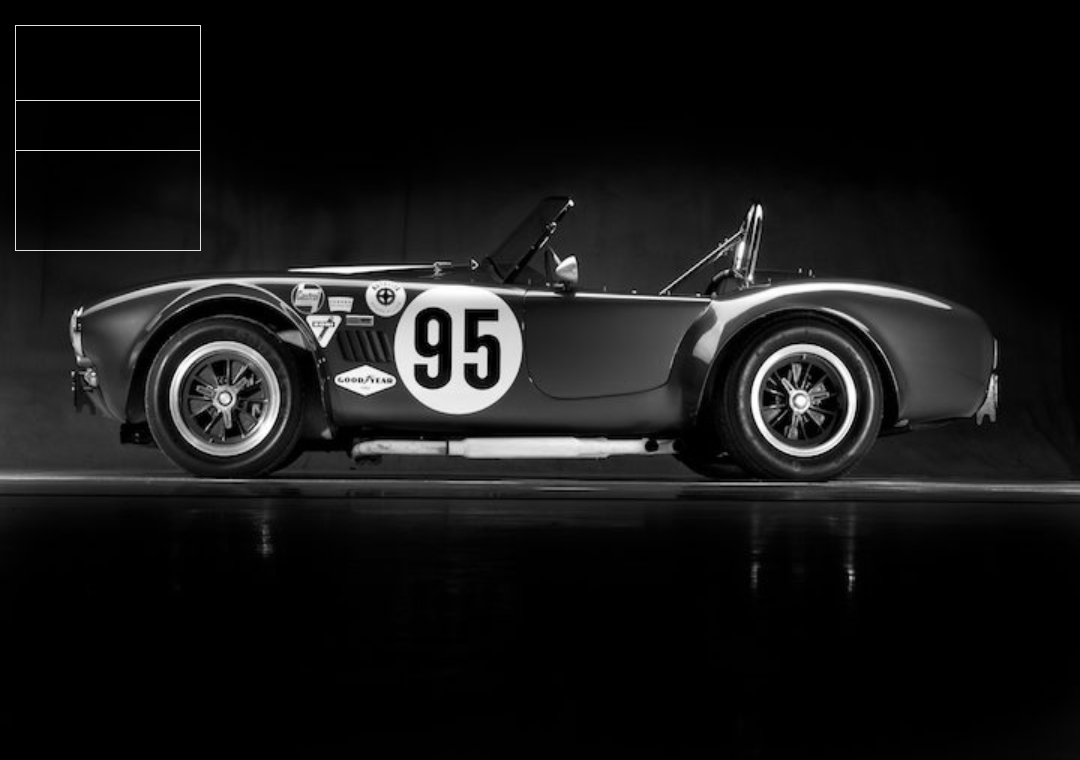

In [146]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )   
cv2_imshow(img2)

In [147]:
height = img.shape[0]  
width = img.shape[1]  
channels = img.shape[2] 

print(height, width, channels)




760 1080 3


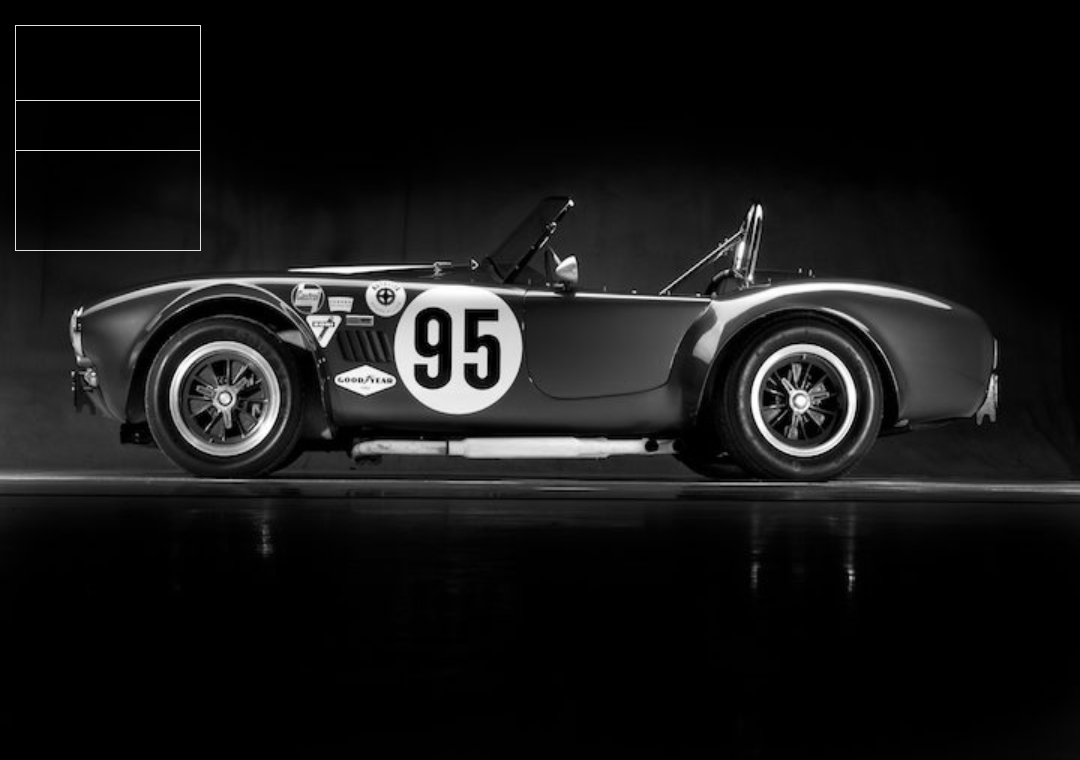

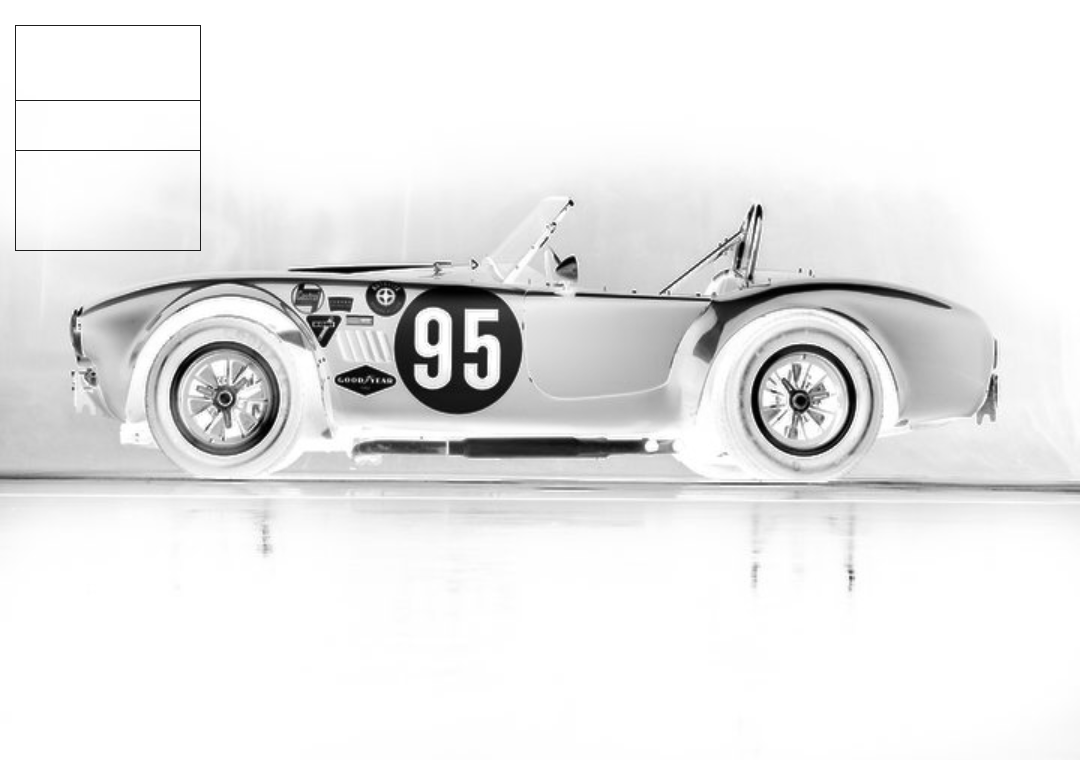

In [148]:
L = img.max()

# Subtracting each intensity from max to obtain negative
negative = L - img2

cv2_imshow(img2)
cv2_imshow(negative)



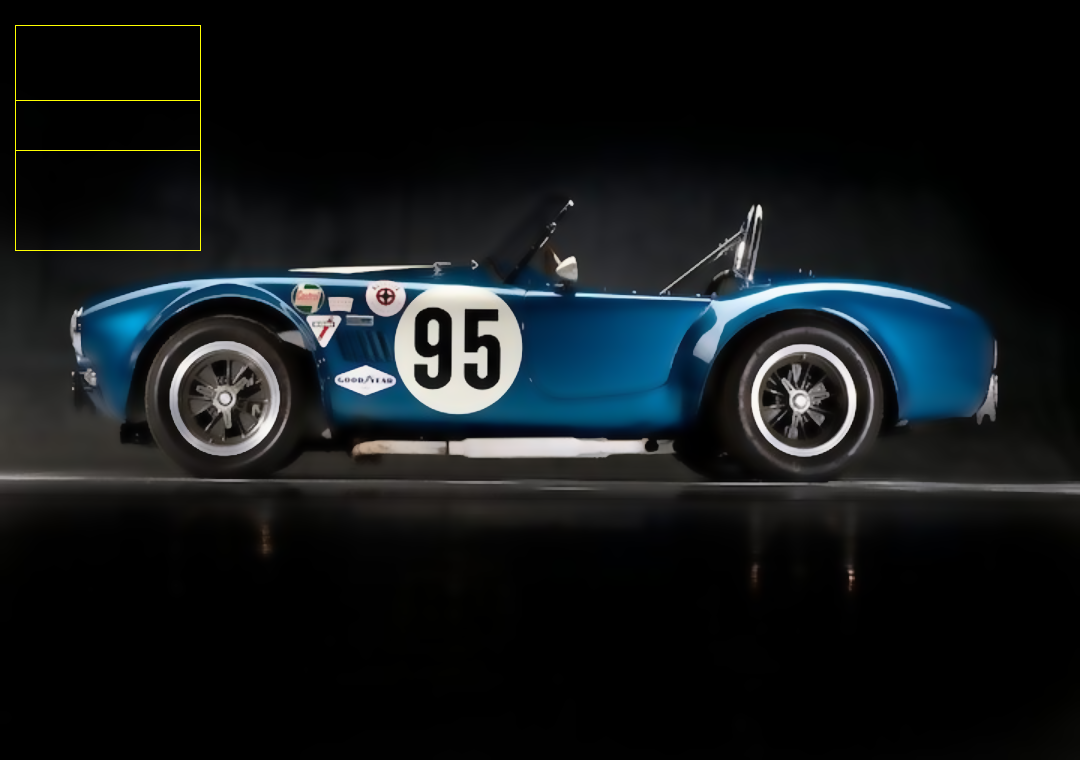

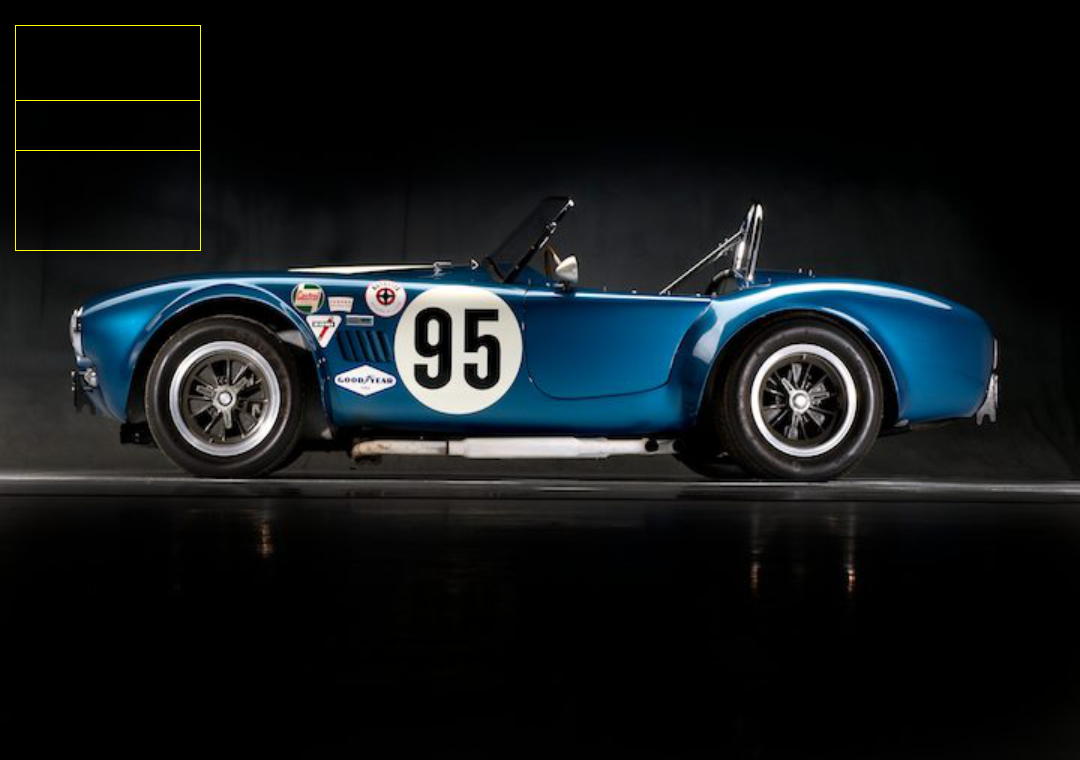

In [149]:
blur = cv2.bilateralFilter(img,15,75,75)   
cv2_imshow(blur)
cv2_imshow(img)

In [ ]:
image3 = cv2.absdiff(img, img2)
cv2_imshow(image3)

NameError: ignored

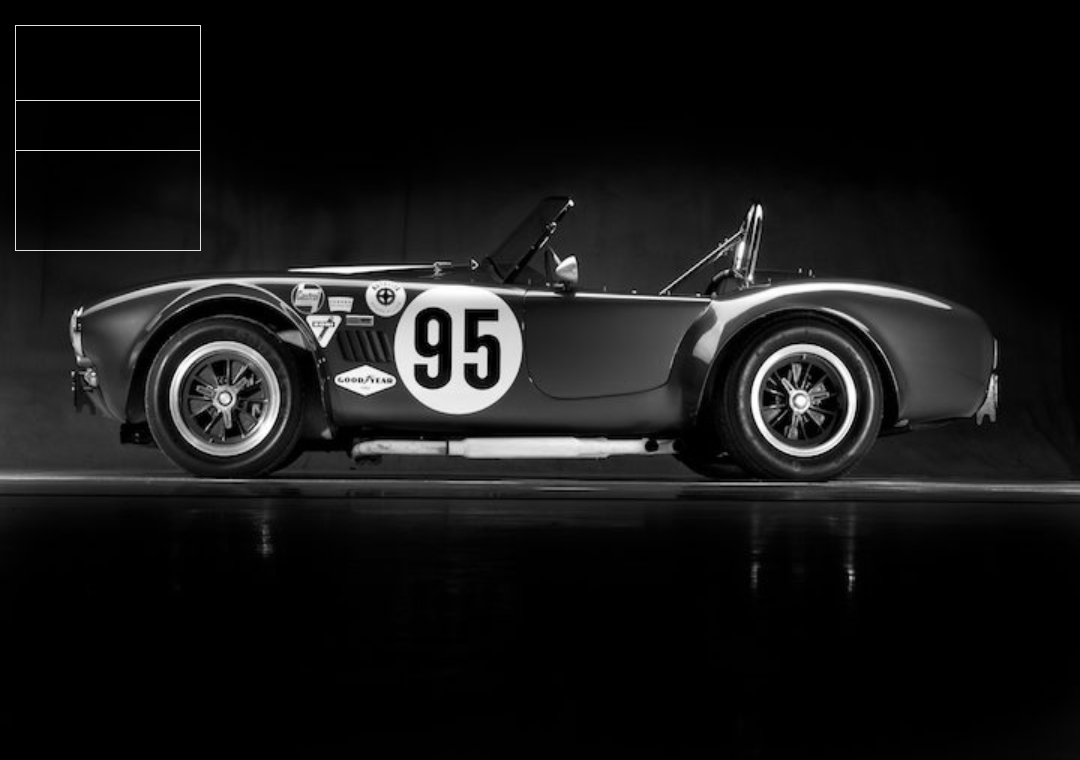

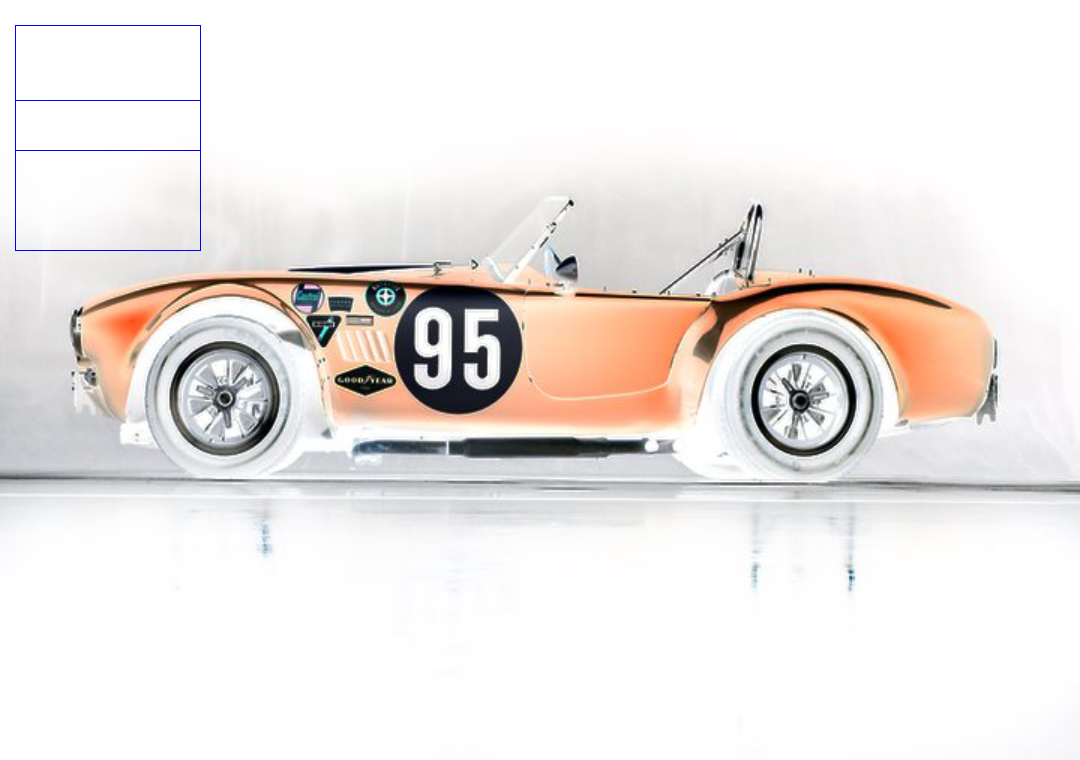

In [150]:
L = img2.max()

# Subtracting each intensity from max to obtain negative
negative = L - img

cv2_imshow(img2)
cv2_imshow(negative)



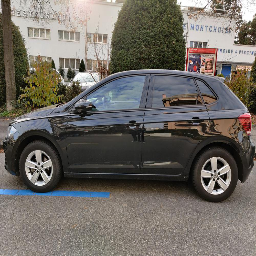

In [154]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import threshold_otsu
path = '/content/drive/MyDrive/image processing/images/IMG_20201123_143908.png'
img = cv2.imread(path)
img = cv2.resize(img,(256,256))
cv2_imshow(img)

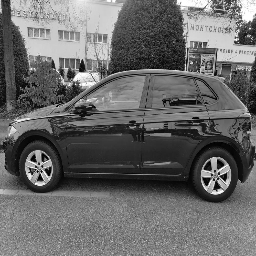

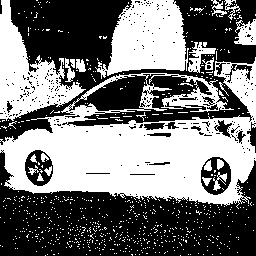

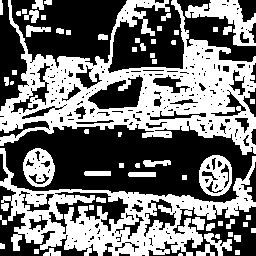

In [155]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
cv2_imshow(gray)
cv2_imshow(thresh)
cv2_imshow(edges)


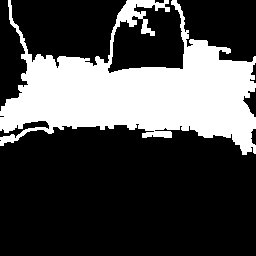

In [156]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
cv2_imshow(masked)


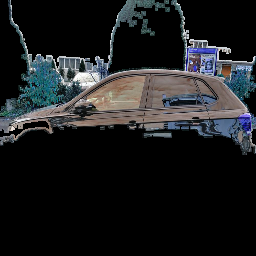

In [157]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
cv2_imshow(segmented)